# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [32]:
df = pd.read_csv("/content/gdrive/MyDrive/441B/Country-data.csv", sep = ",")

In [6]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [42]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)


In [9]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [10]:
kmeans = KMeans(n_clusters=6
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [ ]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

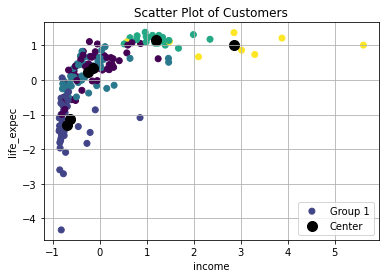

In [11]:
x1_index = 4
x2_index = 6


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [20]:
# WCSS  = []

# for k in range(1,10):
#   kmeans = KMeans(n_clusters = k, n_init = 30, init = "random")
#   kmeans.fit(X_scaled)
#   WCSS.append(kmeans.inertia_)

WCSS = [(KMeans(n_clusters = k, n_init = 30, init = 'random')).fit(X_scaled).inertia_ for k in range(1,10)]
WCSS

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3229986404376,
 632.9632122201926,
 550.5699592955896,
 513.7667090531455,
 454.1354685186976,
 427.22119125266624]

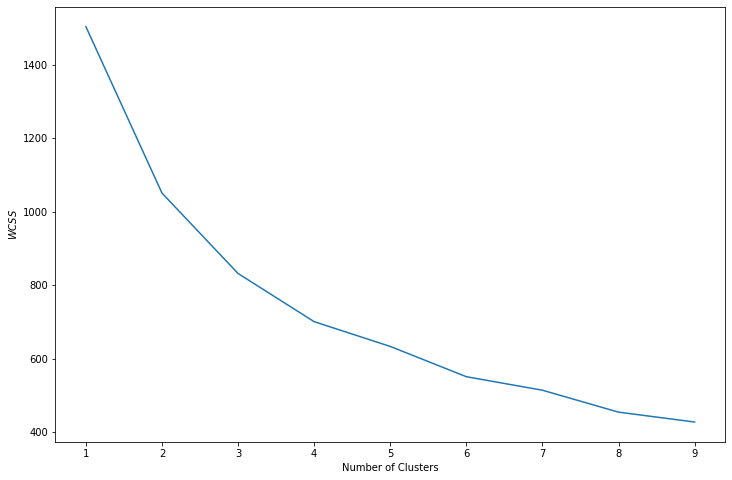

In [24]:
X=np.linspace(1,9,9)

plt.figure(figsize = (12,8))
plt.plot(X,WCSS)
plt.xlabel("Number of Clusters")
plt.ylabel("$WCSS$")
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

K = 6 number of cluster is chosen because WCSS decrease by a large extent until k>6.

In [26]:
k = 6
kmeans = KMeans(n_clusters = k, n_init = 30, init = "random").fit(X_scaled)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [51]:
pred=pd.DataFrame(kmeans.predict(X_scaled),columns=['Cluster'])

df_m=pd.concat([pred,names],axis=1)
pred['Cluster'].unique()

cluster0=list(df_m[df_m['Cluster']==0]['country'].unique())
cluster1=list(df_m[df_m['Cluster']==1]['country'].unique())
cluster2=list(df_m[df_m['Cluster']==2]['country'].unique())
cluster3=list(df_m[df_m['Cluster']==3]['country'].unique())
cluster4=list(df_m[df_m['Cluster']==4]['country'].unique())
cluster5=list(df_m[df_m['Cluster']==5]['country'].unique())

print('Cluster 0\n',cluster0)
print('Cluster 1\n',cluster1)
print('Cluster 2\n',cluster2)
print('Cluster 3\n',cluster3)
print('Cluster 4\n',cluster4)
print('Cluster 5\n',cluster5)

Cluster 0
 ['Algeria', 'Bangladesh', 'Bolivia', 'Botswana', 'Comoros', 'Congo, Rep.', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Ghana', 'Guatemala', 'India', 'Indonesia', 'Iraq', 'Kazakhstan', 'Kenya', 'Lao', 'Madagascar', 'Mauritania', 'Myanmar', 'Namibia', 'Nepal', 'Pakistan', 'Philippines', 'Senegal', 'South Africa', 'Sri Lanka', 'Sudan', 'Tajikistan', 'Timor-Leste', 'Tonga', 'Turkmenistan', 'Uzbekistan', 'Vanuatu', 'Yemen']
Cluster 1
 ['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']
Cluster 2
 ['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti',

Countries where people have similar characteristics are grouped into one cluster.

# 6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [61]:
df_CX=pd.concat([pred,X],axis=1)
df_CX.groupby("Cluster").mean().sort_values(by = "life_expec")

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
2,108.451852,25.330370,7.187037,45.137037,1710.111111,7.770185,56.307407,5.416667,792.629630
0,54.561111,31.685528,4.847500,36.871275,6897.777778,11.915000,66.208333,3.678611,3121.583333
4,57.733333,33.500000,5.140000,30.566667,9786.666667,63.033333,67.366667,3.650000,6160.000000
5,16.936232,44.734783,6.749710,51.840580,14784.202899,5.582913,73.933333,2.114638,8147.188406
1,4.982759,45.703448,9.245862,39.513793,45762.068966,2.727793,80.386207,1.814828,44065.517241
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


# Q7.) Write an observation about the descriptive statistics.

Cluster 3 has the highest average life expectancy which consists of developed countries